In [1]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['lines.linewidth'] = 2.0

## ダークフォトンから転換光への変化

ダークフォトンと転換光が平面波解で書けるとして、 (小高修論の式(1.7), (1.23) で右辺の exp 以外の部分を単純に $\vec{E}_0$ で書いた)
$$
\begin{align}
\mbox{ダークフォトン(DP)} \qquad \left( \begin{array}{cc} \vec{E}_\mathrm{DP} \\ \vec{E}'_\mathrm{DP} \end{array} \right) 
&= \vec{E}_{\mathrm{DP},~0} 
\left( \begin{array}{cc} -\chi \\ 1 \end{array} \right) 
\exp{[-i(\omega_\mathrm{DP} t - \vec{k}_\mathrm{DP}\cdot\vec{x})]} \\
  \\
\mbox{転換光(out)} \qquad \left( \begin{array}{cc} \vec{E}_\mathrm{out} \\ \vec{E}'_\mathrm{out} \end{array} \right) 
&= \vec{E}_{\mathrm{out},~0}
\left( \begin{array}{cc} 1 \\ \chi \end{array} \right) 
\exp{[-i(\omega_\mathrm{out} t - \vec{k}_\mathrm{out}\cdot\vec{x})]} 
\end{align}
$$
DP における定義は
$$
\begin{align}
    \omega_\mathrm{DP} &= 2\pi\nu_\mathrm{DP} 
    && \mbox{角周波数}\\
    E_\mathrm{DP} = h\nu_\mathrm{DP} &= m_\mathrm{DP}\gamma c^2  
    && \mbox{エネルギー保存}\\
    \Leftrightarrow  \nu_\mathrm{DP} &= \frac{m_\mathrm{DP}c^2}{h}\frac{1}{\sqrt{1 - (v_\mathrm{DP}/c)^2}} 
    \qquad && \mbox{相対論で $v_\mathrm{DP}$ が少し効く} \\
    \Leftrightarrow  \omega_\mathrm{DP} &= \frac{m_\mathrm{DP}c^2}{\hbar}\frac{1}{\sqrt{1 - (v_\mathrm{DP}/c)^2}} 
    \qquad && 
\end{align}
$$

z=0 (金属板境界面) での xy 平面の電場が0であることから
$$
\begin{align}
    &&\vec{E}_{\mathrm{sum}, ||}(z=0) &= 0 \\
    \Leftrightarrow &&
    \vec{E}_\mathrm{out, ||}(z=0) &= - \vec{E}_\mathrm{DP, ||}(z=0)\\
    \Leftrightarrow &&
    % 転換光
    \vec{E}_{\mathrm{out},~0, ||} \exp{[-i(\omega_\mathrm{out} t - k_{\mathrm{out},x}x - k_{\mathrm{out},y}y))]} 
    &=
    % DP 
    \chi\vec{E}_{\mathrm{DP},~0, ||} \exp{[-i(\omega_\mathrm{DP} t - k_{\mathrm{DP},x}x - k_{\mathrm{DP},y}y)]} 
\end{align}
$$

あらゆる $t$, $x$, $y$ で成り立つとすると、転換光(out) の変数は
$$
\begin{align}
電場の大きさ && \vec{E}_{\mathrm{out},~0, ||} &= -\chi\vec{E}_{\mathrm{DP},~0, ||} \\
角周波数     && \omega_\mathrm{out} &= \omega_\mathrm{DP} = \frac{m_\mathrm{DP}c^2}{\hbar}\frac{1}{\sqrt{1 - (v_\mathrm{DP}/c)^2}} \\
k(波数ベクトル) &&  k_{\mathrm{out},x} &= k_{\mathrm{DP},x}, \\
                &&  k_{\mathrm{out},y} &= k_{\mathrm{DP},y}
\end{align}
$$

## 転換光の波数ベクトル(運動量)
上より、転換光の電場は
$$
\vec{E}_\mathrm{out, ||}
= \chi\vec{E}_{\mathrm{DP},~0, ||}
\exp{\left[-i\left\{
\left(\frac{m_\mathrm{DP}c^2}{h}\frac{1}{\sqrt{1 - (v_\mathrm{DP}/c)^2}} \right) t 
    - k_{\mathrm{DP}, x}{x}
    - k_{\mathrm{DP}, y}{y}
    - k_{\mathrm{out}, z}{z}
    \right\}\right]} 
$$

波数ベクトル $k_\mathrm{DP}$ はエネルギーに直すと
$$
\hbar c \, \vec{k}_\mathrm{DP} \qquad \mbox{(エネルギーの単位で次元を合わせた。 $k$ [1/m], $\hbar c$ [eV $\cdot$ m])} \\
$$

$$
\begin{align}
&& \hbar c |k_\mathrm{out}| &=  \hbar c \sqrt{k_{\mathrm{out},x}^2 + k_{\mathrm{out},y}^2 + k_{\mathrm{out},z}^2} \\
&&                 &= \hbar \omega_\mathrm{out} \\
&&                 &= m_\mathrm{DP}c^2\frac{1}{\sqrt{1 - (v_\mathrm{DP}/c)^2}}  \\
\Leftrightarrow  \\
&& |k_\mathrm{out}| &= \sqrt{k_{\mathrm{out},x}^2 + k_{\mathrm{out},y}^2 + k_{\mathrm{out},z}^2} = \frac{m_\mathrm{DP}c}{\hbar}\frac{1}{\sqrt{1 - (v_\mathrm{DP}/c)^2}}
\end{align}
$$

これより $k_{\mathrm{out},z}$ も $k_{\mathrm{out},x}, k_{\mathrm{out},y}$ から求められ
$$
    k_{\mathrm{out},z}^2 = \left( \frac{m_\mathrm{DP}c}{\hbar}\frac{1}{\sqrt{1 - (v_\mathrm{DP}/c)^2}} \right)^2 - k_{\mathrm{DP},x}^2 - k_{\mathrm{DP},y}^2
$$

DP の運動量 $p_\mathrm{DP}$ について、波数ベクトル $k_\mathrm{DP}$ との関係を考えると
$$
    p_\mathrm{DP}c = \hbar c k_\mathrm{DP} \\
\Leftrightarrow    p_\mathrm{DP} = m_\mathrm{DP} v_\mathrm{DP} = \hbar k_\mathrm{DP} \\
\Leftrightarrow    k_\mathrm{DP} = \frac{m_\mathrm{DP}}{\hbar} v_\mathrm{DP}
$$

よって、$k_{\mathrm{out},x}$, $k_{\mathrm{out},y}$, $k_{\mathrm{out},z}$ をすべて DP の速度 $\vec{v} = (v_x, v_y, v_z)$ で書くと
$$
\begin{align}
k_{\mathrm{out}, x} &= \frac{m_\mathrm{DP}}{\hbar} v_{\mathrm{DP}, x} \\
k_{\mathrm{out}, y} &= \frac{m_\mathrm{DP}}{\hbar} v_{\mathrm{DP}, y} \\
k_{\mathrm{out}, z} &= \sqrt{ \left(\frac{m_\mathrm{DP}c}{\hbar}\frac{1}{\sqrt{1 - (v_\mathrm{DP}/c)^2}} \right)^2 - \left(\frac{m_\mathrm{DP}}{\hbar} v_{\mathrm{DP}, x}\right)^2- \left(\frac{m_\mathrm{DP}}{\hbar} v_{\mathrm{DP}, y}\right)^2 } \\
                    &= \frac{m_\mathrm{DP}c}{\hbar}\sqrt{ \left(\frac{1}{\sqrt{1 - (v_\mathrm{DP}/c)^2}} \right)^2 - \left(\frac{v_{\mathrm{DP}, x}}{c} \right)^2- \left(\frac{v_{\mathrm{DP}, y}}{c} \right)^2 } \\
\end{align}
$$

転換光のピーク波長 $\lambda$ を考えると、エネルギー保存より
$$
    h\nu = h\frac{c}{\lambda} = m_\mathrm{DP}c^2 \\
 \Leftrightarrow
     \lambda = \frac{h}{m_\mathrm{DP}c} = \frac{2\pi\hbar}{m_\mathrm{DP}c}
$$
であるので、
$k_{\mathrm{out},x}$, $k_{\mathrm{out},y}$, $k_{\mathrm{out},z}$ は

$$
\begin{align}
k_{\mathrm{out}, x} &= \frac{2\pi}{\lambda} \frac{v_{\mathrm{DP}, x}}{c} \\
k_{\mathrm{out}, y} &= \frac{2\pi}{\lambda} \frac{v_{\mathrm{DP}, y}}{c} \\
k_{\mathrm{out}, z} &= \frac{2\pi}{\lambda}\sqrt{ \left(\frac{1}{\sqrt{1 - (v_\mathrm{DP}/c)^2}} \right)^2 - \left(\frac{v_{\mathrm{DP}, x}}{c} \right)^2- \left(\frac{v_{\mathrm{DP}, y}}{c} \right)^2 } \\
\end{align}
$$

## $v_\mathrm{DP}$ の不定性からくる転換光のコヒーレンス長

$v_\mathrm{DP}$ は分布を持って広がっていて、　平均 $\bar{v}_\mathrm{DP} = 220$ km/sec, 分散 $\Delta v_\mathrm{DP} = 220$ km/sec くらいと考えられている。

$k_\mathrm{out}$ の不定性は 
$$
\Delta k_\mathrm{out} = \frac{2\pi}{\lambda}\frac{\Delta v_\mathrm{DP}}{c}
$$
となる

**コヒーレンス長 $\Delta x$ を1周期($2\pi$)ずらす長さ** として、 ($\vec{k}\cdot\vec{x}$ で $\exp$ の肩に位相が効いてくるので)
$$
\begin{align}
    \Delta k_\mathrm{out} \Delta x &\sim 2\pi \\
    \Delta x &\sim \frac{2\pi}{\Delta k_\mathrm{out}} = \lambda \frac{c}{\Delta v_\mathrm{DP}} \sim \lambda \times \frac{3.0}{2.2} 10^{3}
\end{align}
$$
$\lambda = 15$ mm ($\leftrightarrow 20$ GHz) で  $\Delta x \sim 2.045 \times 10^4 \mathrm{mm} = 20.45 \mathrm{m}$

## $v_\mathrm{DP}$ の不定性からくる転換光のコヒーレンス時間

$v_\mathrm{DP}$ は分布を持って広がっていて、　平均 $\bar{v}_\mathrm{DP} = 220$ km/sec, 分散 $\Delta v_\mathrm{DP} = 220$ km/sec くらいと考えられている。

$\omega_\mathrm{out}$ は
$$
 \omega_\mathrm{out} = \omega_\mathrm{DP} = \frac{m_\mathrm{DP}c^2}{\hbar}\frac{1}{\sqrt{1 - (v_\mathrm{DP}/c)^2}} 
$$
であった。
ピーク周波数 $\nu$ を $h\nu = m_\mathrm{DP}c^2$ と定義すると
$$
 \omega_\mathrm{out} = 2\pi\nu \frac{1}{\sqrt{1 - (v_\mathrm{DP}/c)^2}} 
$$

$v_\mathrm{DP}/c << 1$ についてテイラー展開すると (中略)
$$
 \omega_\mathrm{out} = 2\pi \nu \left( 1 + \frac{1}{2}\left(\frac{v_\mathrm{DP}}{c}\right)^2 + O\left(\frac{v_\mathrm{DP}}{c}\right)^4 \right)
$$

よって、$\omega_\mathrm{out}$ の $\Delta v_\mathrm{DP}$ からくる不定性は、
$$
 \Delta \omega_\mathrm{out} = \pi\nu \left(\frac{\Delta v_\mathrm{DP}}{c}\right)^2
$$

**コヒーレンス長を $\Delta t$ を1周期($2\pi$)ずらす時間** として、 ($\omega$ で $\exp$ の肩に位相が効いてくるので)
$$
\begin{align}
    \Delta \omega_\mathrm{out} \Delta t &\sim 2\pi \\
    \Delta t &\sim \frac{2\pi}{\Delta \omega_\mathrm{out}} \\
    &= \frac{2}{\nu}\left(\frac{c}{\Delta v_\mathrm{DP}}\right)^2 \\
    &= \frac{2}{\nu} \left( \frac{3.0}{2.2} 10^{3} \right)^2
    = 3.719 \times 10^6 \frac{1}{\nu \mbox{[Hz]}}
    = 3.719 \times 10^{-3} \frac{1}{\nu \mbox{[GHz]}}
\end{align}
$$

$\lambda = 15$ mm ($\leftrightarrow 20$ GHz) で  $\Delta t \sim 1.859 \times 10^{-4} \,\mathrm{sec} = 185.9 \,\mu\mathrm{sec}$

RBW = 300 Hz だと FFT する時間窓 $\Delta T = 1/\mathrm{RBW} = 1/300 = 3333 \,\mu\mathrm{sec}$
$$
\Delta T/\Delta t = 17.92
$$

In [2]:
freq0 = 20.e+9  # Hz
freq_span = 2.5e+6 # Hz
N = 32768
freq_down = freq0 - freq_span/2.
freq = freq0 - freq_down
RBW = 300.
freq_samp = freq_span*2

dt = 1./freq_samp
time_span = dt * N
time = np.arange(0.,time_span,dt)
print(f'time (size:{len(time):e}) = {time}')

time (size:3.276800e+04) = [0.0000e+00 2.0000e-07 4.0000e-07 ... 6.5530e-03 6.5532e-03 6.5534e-03]


In [3]:
amp = 1. # W
def tod_sin(amp, freq, time, offset=0.):
    return amp*np.sin(2.*np.pi*freq*time+offset)

## Nominal sinuous signal

freq after downconversion = 2000000.0 Hz


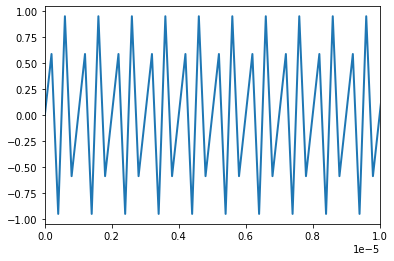

In [4]:
print(f'freq after downconversion = {freq} Hz')
y_sin = tod_sin(amp,freq,time)

plt.plot(time, y_sin)
plt.xlim(0.,10.e-6)
plt.show()

## Sinuous signal with random phase in a specific interval

In [5]:
y_sin_rand = []
coherent_time = 186.e-6
n_ctime = coherent_time/dt
n_dec_time = (int)(len(time)/n_ctime)
i_start = 0
time_start = 0.
intervals = []
phases = []
for i in range(n_dec_time):
    if i%10000 == 0:
        print(f'start = {time_start:e} sec')
        pass
    interval = coherent_time
    time_end = time_start + interval
    i_end   = (int)(time_end/dt)
    _time = time[i_start:i_end]
    offset = np.random.rand()*2.*np.pi
    y_sin_rand += tod_sin(amp, freq, _time, offset).tolist()
    
    intervals.append(interval)
    phases.append(offset)
    i_start = i_end
    time_start = time_end
    pass
y_sin_rand = np.array(y_sin_rand)
intervals = np.array(intervals)
phases = np.array(phases)

start = 0.000000e+00 sec


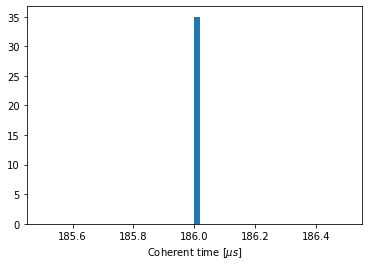

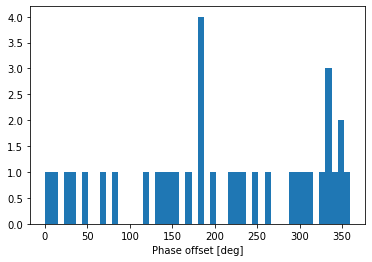

In [6]:
plt.hist(intervals*1.e+6, 50)
plt.xlabel(r'Coherent time [$\mu s$]')
plt.show()
plt.hist(phases*180./np.pi, 50)
plt.xlabel('Phase offset [deg]')
plt.show()

## Sinuous signal with random phase in random intervals (sigma = coherent_time/2)

In [7]:
y_sin_rand2 = []
time_start = 0.
i_start = 0
intervals2 = []
phases2 = []
while len(y_sin_rand2)<len(time):
    interval = 0.
    while interval<=0.:
        interval = np.random.normal(coherent_time, scale=coherent_time/2.)
        pass
    time_end = time_start + interval
    i_end   = (int)(time_start/dt)
    _time = time[i_start:i_end]
    offset = np.random.rand()*2.*np.pi
    y_sin_rand2 += tod_sin(amp,freq,_time,offset).tolist()
    
    intervals2.append(interval)
    phases2.append(offset)
    i_start = i_end
    time_start = time_end
    pass
y_sin_rand2 = np.array(y_sin_rand2)
intervals2 = np.array(intervals2)
phases2 = np.array(phases2)

### Check Intervals, Phases

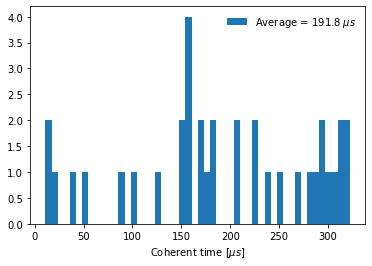

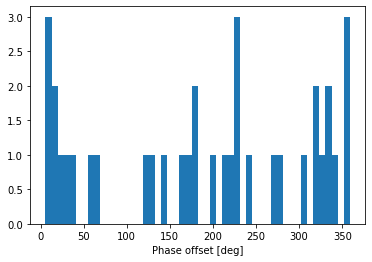

In [8]:
plt.hist(intervals2*1.e+6, 50, label=f'Average = {np.mean(intervals2*1.e+6):.1f} $\mu s$')
plt.xlabel(r'Coherent time [$\mu s$]')
plt.legend(frameon=False)
plt.show()
plt.hist(phases2*180./np.pi, 50)
plt.xlabel('Phase offset [deg]')
plt.show()

In [22]:
def plotTOD(xmin=0, xmax=50):
    plt.figure(figsize=(15,3))
    plt.plot(time*1.e+6, y_sin, c='tab:blue', label='Nominal')
    plt.plot(time[0:len(y_sin_rand)]*1.e+6, y_sin_rand, c='tab:orange', label=f'Varied phase in {coherent_time*1e+6} $\mu s$')
    plt.plot(time[0:len(y_sin_rand2)]*1.e+6, y_sin_rand2, c='tab:red', label=f'Varied phase in random time')
    plt.plot([0.,time_span*1e+6],[0,0],c='k',linewidth=1)
    plt.legend(frameon=False, loc='upper right')
    plt.xlim(xmin, xmax)
    plt.ylim(-1.1,2.1)
    plt.xlabel('Time [$\mu s$]')
    plt.show()
    plt.close()
    return

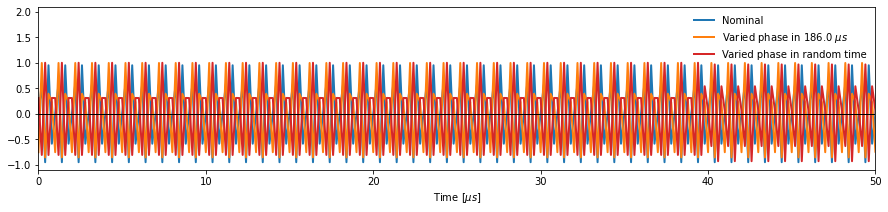

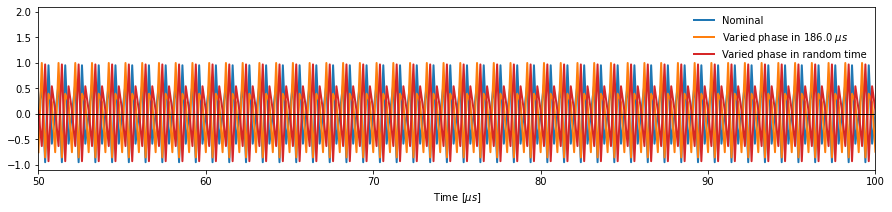

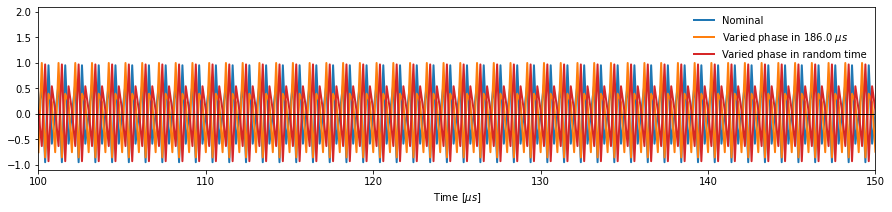

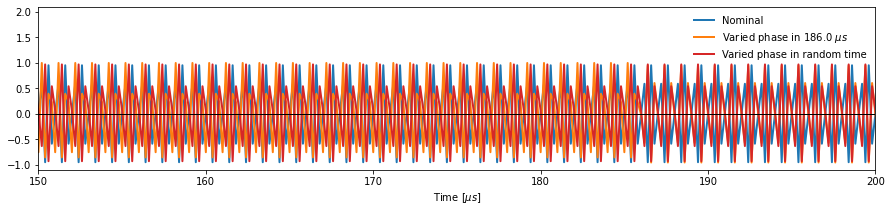

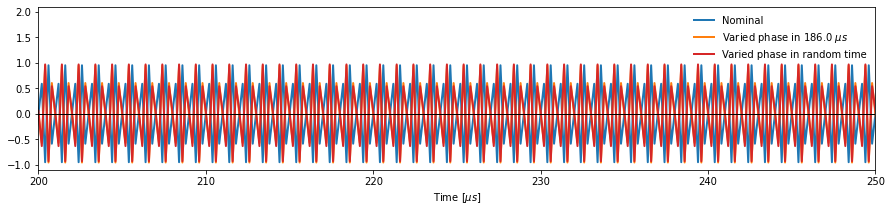

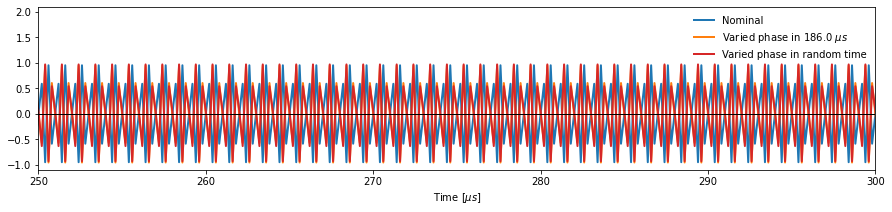

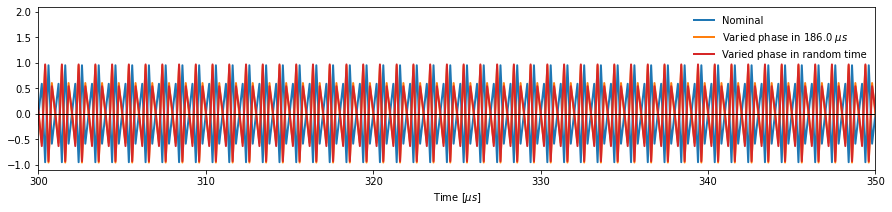

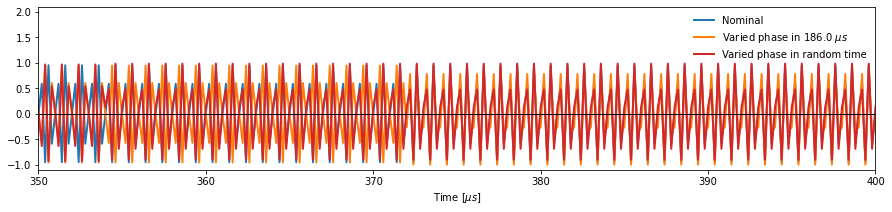

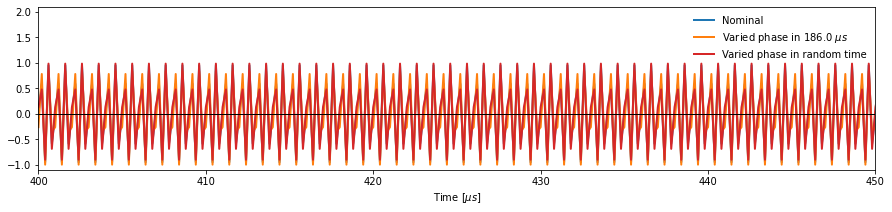

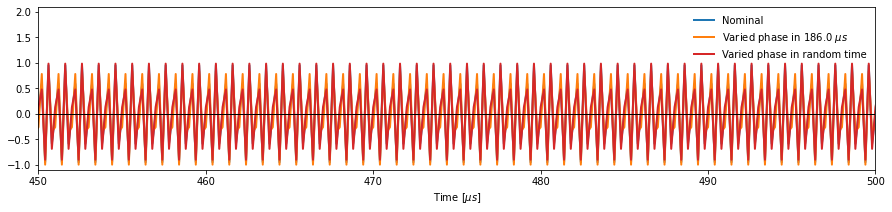

In [23]:
_time_span = 50
for i in range(0, 500, _time_span):
    plotTOD(i, i+_time_span)
    pass

In [42]:
def plot_fft(freq_list, F_list, color_list=['tab:blue'], xmin=None, xmax=None, logx=True, onlyMag=True, ymin=None, ymax=None, logy=True):
    fig, ax = plt.subplots(nrows=1 if onlyMag else 3, sharex=True, figsize=(15,8))
    if onlyMag:
        ax = [ax]
        pass
    if xmin is None:
        xmin = freq*0.1
        pass
    if xmax is None:
        xmax = freq*10.
        pass
    #xmin = (freq - 1e+3)
    #xmax = (freq + 1e+3)
    
    for _freq, _F, _c in zip(freq_list, F_list, color_list):
        ax[0].plot(_freq[_freq>=0.]*1e-6, np.abs(_F[_freq>=0.]), label="Magnitude", color=_c, linewidth=0.5)
        ax[0].set_xlim(xmin=xmin*1e-6, xmax=xmax*1e-6)
        if logy: ax[0].set_yscale('log')
        ax[0].grid()
        if ymin is not None: ax[0].set_ylim(bottom=ymin)
        if ymax is not None: ax[0].set_ylim(top=ymax)
        if logx:
            ax[0].set_xscale('log')
            pass
        if not onlyMag:
            ax[1].plot(_freq[_freq>=0.]*1e-6, _F.real[_freq>=0.], label="Real part", color=_c, linewidth=0.5)
            ax[2].plot(_freq[_freq>=0.]*1e-6, _F.imag[_freq>=0.], label="Imaginary part", color=_c, linewidth=0.5)
            ax[1].set_xlim(xmin=xmin*1e-6, xmax=xmax*1e-6)
            ax[2].set_xlim(xmin=xmin*1e-6, xmax=xmax*1e-6)
            if ymin is not None: ax[1].set_ylim(bottom=ymin)
            if ymax is not None: ax[1].set_ylim(top=ymax)
            if ymin is not None: ax[2].set_ylim(bottom=ymin)
            if ymax is not None: ax[2].set_ylim(top=ymax)
            ax[2].set_xlabel("Frequency [MHz]")
            ax[1].grid()
            ax[2].grid()
            if logx:
                ax[1].set_xscale('log')
                ax[2].set_xscale('log')
                pass
            pass
        else:
            ax[0].set_xlabel("Frequency [MHz]")
            pass
        print(f'Max power = {np.max(np.abs(_F)):e}')
        pass
    plt.show()
    plt.close()
    pass

Max power = 8.191677e+03


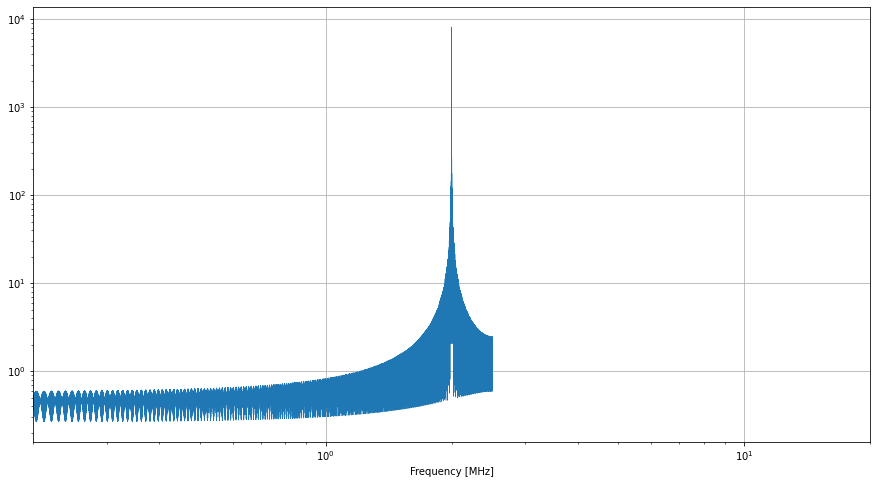

In [50]:
filter_time_window = np.full(len(y_sin), 1.)
time_span = time[-1]
window_span = 1./RBW
time_min = time_span/2. - window_span/2.
time_max = time_span/2. + window_span/2.
filter_time_window[np.where(time<time_min)] = 0.
filter_time_window[np.where(time>time_max)] = 0.
F = np.fft.fft(y_sin*filter_time_window, ) # 変換結果
freqfft = np.fft.fftfreq(len(y_sin), d=dt) # 周波数
plot_fft([freqfft], [F])

Max power = 3.271570e+03


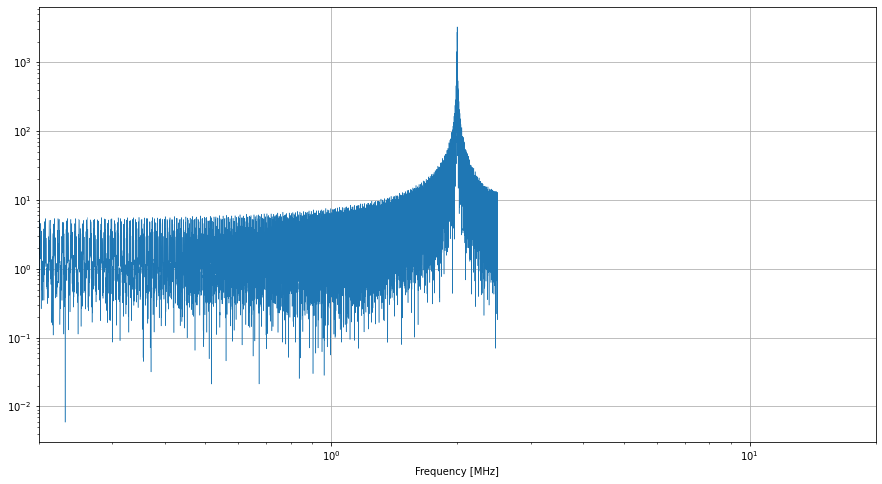

In [51]:
F_rand = np.fft.fft(y_sin_rand*filter_time_window[:len(y_sin_rand)]) # 変換結果
freqfft_rand = np.fft.fftfreq(len(y_sin_rand), d=dt) # 周波数
plot_fft([freqfft_rand], [F_rand])

Max power = 3.202504e+03


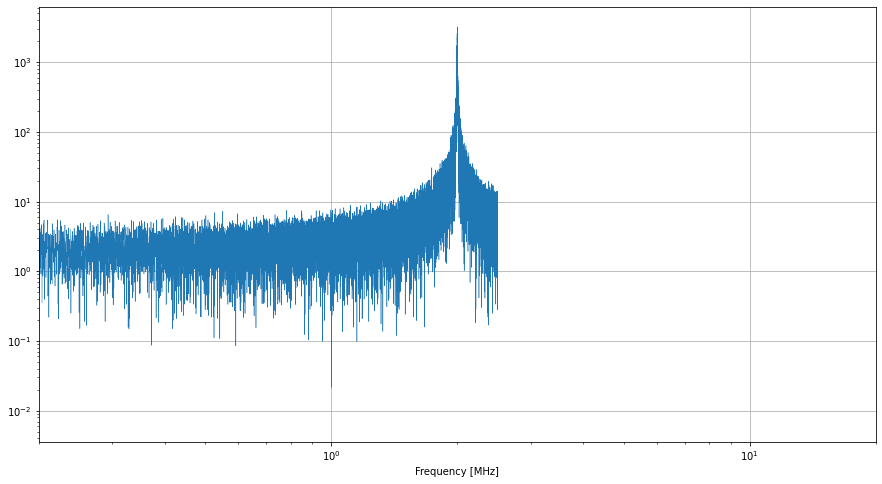

In [52]:
F_rand2 = np.fft.fft(y_sin_rand2*filter_time_window[:len(y_sin_rand2)]) # 変換結果
freqfft_rand2 = np.fft.fftfreq(len(y_sin_rand2), d=dt) # 周波数
plot_fft([freqfft_rand2], [F_rand2])

Max power = 8.191677e+03
Max power = 3.271570e+03
Max power = 3.202504e+03


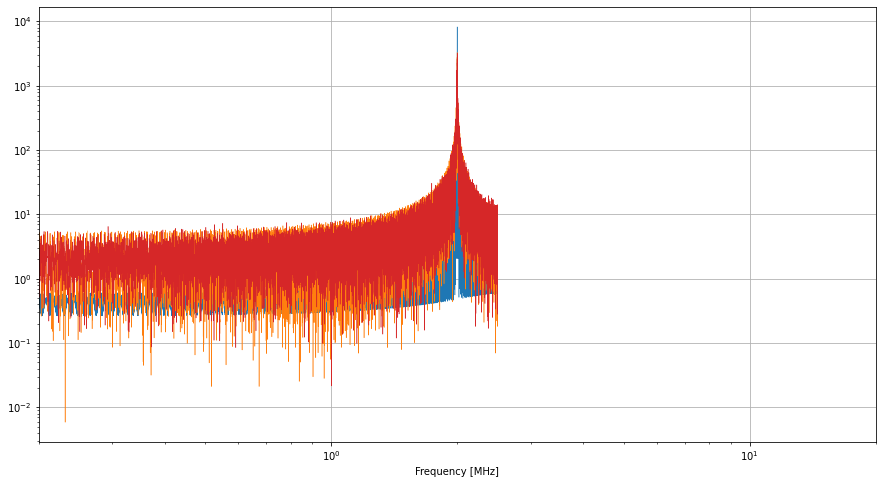

In [56]:
plot_fft([freqfft, freqfft_rand, freqfft_rand2], [F, F_rand, F_rand2], color_list=['tab:blue', 'tab:orange', 'tab:red'])

Max power = 3.202504e+03
Max power = 3.271570e+03
Max power = 8.191677e+03


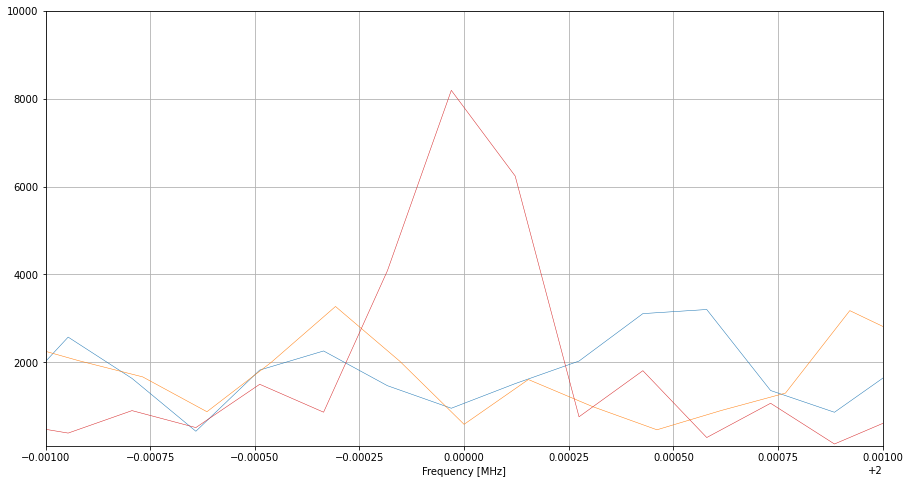

In [54]:
plot_fft([freqfft_rand2, freqfft_rand, freqfft], [F_rand2, F_rand, F], 
         color_list=['tab:blue', 'tab:orange', 'tab:red'], 
         xmin=freq-1e+3, xmax=freq+1e+3, logx=False, logy=False, ymin=100, ymax=10000)

Max power = 3.202504e+03
Max power = 3.271570e+03
Max power = 8.191677e+03


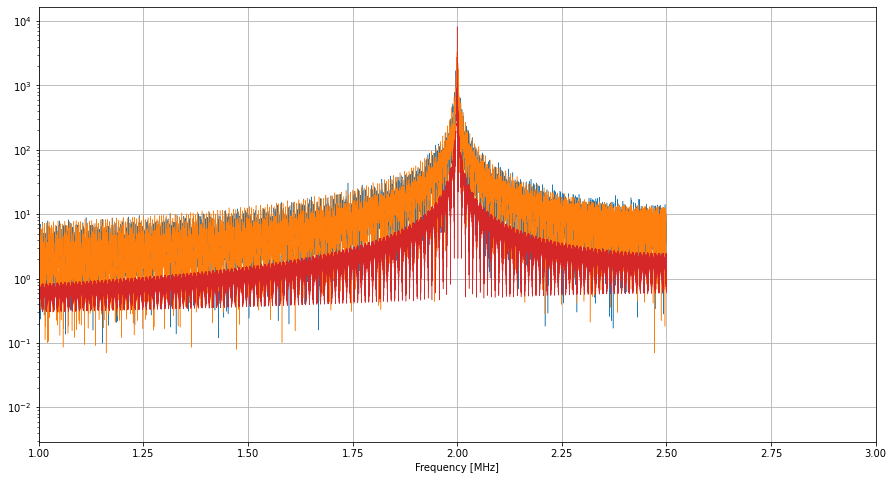

In [55]:
plot_fft([freqfft_rand2, freqfft_rand, freqfft], [F_rand2, F_rand, F], 
         color_list=['tab:blue', 'tab:orange', 'tab:red'], 
         xmin=freq-1000e+3, xmax=freq+1000e+3, logx=False)